<a href="https://colab.research.google.com/github/6306863958/Afame-Technologies/blob/main/cat_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:15<00:00, 99.4MB/s]
100% 1.06G/1.06G [00:15<00:00, 75.9MB/s]


In [3]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D,Dense,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [4]:
train_ds=keras.utils.image_dataset_from_directory (
     directory = '/content/train',
     labels="inferred",
     label_mode="int",
    batch_size=32,
    image_size=(256,256)
)


validation_ds=keras.utils.image_dataset_from_directory (
     directory = '/content/test',
     labels="inferred",
     label_mode="int",
    batch_size=32,
    image_size=(256,256)
)





Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [5]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [6]:
#CREATE CNN model
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 76s 109ms/step - loss: 1.3059 - accuracy: 0.5428 - val_loss: 0.6402 - val_accuracy: 0.6164
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 0.6456 - accuracy: 0.6000 - val_loss: 0.6209 - val_accuracy: 0.6118
Epoch 3/10
625/625 [==============================] - 72s 114ms/step - loss: 0.5847 - accuracy: 0.6676 - val_loss: 0.5751 - val_accuracy: 0.6670
Epoch 4/10
625/625 [==============================] - 71s 112ms/step - loss: 0.5234 - accuracy: 0.7158 - val_loss: 0.5500 - val_accuracy: 0.7284
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4464 - accuracy: 0.7606 - val_loss: 0.4707 - val_accuracy: 0.7816
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3943 - accuracy: 0.7951 - val_loss: 0.4914 - val_accuracy: 0.7746
Epoch 7/10
625/625 [==============================] - 68s 109ms/step - loss: 0.3478 - accuracy: 0.8238 - val_loss: 0.6810 - val_ac

In [ ]:
from keras import regularizers
model.add(Dense(64, input_dim=64,
               kernel_regularizer=regularizers.l2(0.01)


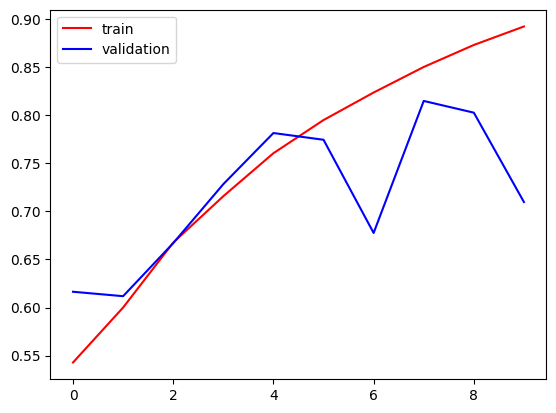

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


In [10]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [23]:
import cv2
test_img = cv2.imread('/content/cat.jpg')


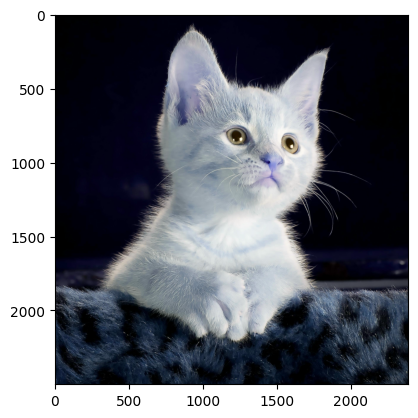

In [24]:
plt.imshow(test_img)

In [25]:
test_img.shape

(2500, 2392, 3)

In [26]:
test_img = cv2.resize(test_img,(256,256))

In [28]:
test_input = test_img.reshape((1,256,256,3))

In [29]:
model.predict([test_input])

1/1 [==============================] - 0s 413ms/step


array([[0.]], dtype=float32)

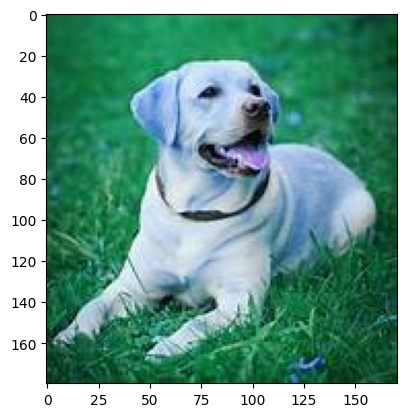

In [31]:
test_img = cv2.imread('/content/dog.jpg')
plt.imshow(test_img)
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))

In [32]:
model.predict([test_input])

1/1 [==============================] - 0s 20ms/step


array([[1.]], dtype=float32)